# Objetivo

El objetivo de este notebook de Colab es realizar análisis exploratorio de datos (EDA) y preprocesamiento de los datos, sobre el dataset elegido para el proyecto final de la certificación (hackaton)

>24/08/24
>
>Marco Mongi
>
>DS2402

# Definición del problema
El consumo de energía eléctrica viene aumentando en los últimos años con mayor velocidad que su generación, acentuado últimamente por las granjas de servidores para correr modelos de IA.

Bajo este panorama, surge la necesidad de establecer estrategias para poder balancear el suministro de carga de energía eléctrica de forma inteligente (smarts grids)

Una alternativa es hacer uso de "baterías virtuales" de electricidad, que consiste en campañas sociales que fomentan el uso de la electricidad en horarios en los que la demanda no es pico, logrando así una mejor distribución de la energía. Los usuarios que cumplen con los lineamientos establecidos reciben alguna bonificación, y la empresa proveedora de electricidad se asegura un menor consumo en horarios pico, evitando gastos por exceso de consumo que deriva en mantenimiento de la red, y cortes para los usuarios del servicio.

Bajo este concepto, el problema a resolver en este trabajo consiste en estimar los patrones de consumo de energía eléctrica de una vivienda tipo, para poder predecir su consumo en el futuro y con este dato, facilitar la toma de decisiones informada a la empresa prestadora para hacer un balanceo de recursos más inteligente

>**Resumiendo** el foco de este trabajo va a ser predecir el consumo de energía eléctrica futuro en base al histórico (modelo de regresión, series temporales)

# Definir y obtener los datos

El dataset proviene de https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption


Contiene 2075259 mediciones obtenidas en una casa de Francia, entre diciembre de 2006 y noviembre de 2010 (47 meses). Hay una medición por minuto

## Cargo el dataset desde drive
Va a pedir acceso a la cuenta de google
Lo siguiente lee un archivo desde drive, y carga el archivo Dataset.csv en el entorno de ejecución

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link='https://drive.google.com/file/d/1pkA1axJqfW2issgcQ2uhJYGVpEYKZZGX'
fluff, id = link.split('d/')
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Dataset.csv')

## Cargo dataset

In [2]:
# Importo pandas, para leer datos en forma de tablas (dataframes)
import pandas as pd

In [3]:
# Asigno el contenido del csv a un dataframe
df = pd.read_csv('Dataset.csv',sep=',')

<ipython-input-3-3f5b3c0b1d55>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset.csv',sep=',')


In [4]:
# Muestro los primeros 20 elementos del dataset (sin procesar)
df.head(20)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


**Descripción de los campos en el dataset**

1. **date:** Date in format dd/mm/yyyy
2. **time:** time in format hh:mm:ss
3. **global_active_power:** household global minute-averaged active power (in kilowatt)
4. **global_reactive_power:** household global minute-averaged reactive power (in kilowatt)
5. **voltage:** minute-averaged voltage (in volt)
6. **global_intensity:** household global minute-averaged current intensity (in ampere)
7. **sub_metering_1:** energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. **sub_metering_2:** energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. **sub_metering_3:** energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Preprocesamiento de los datos

## Valores faltantes

In [5]:
# Cantidad de valores nulos
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


Tengo valores faltantes, algunos están como NaN y otros con el caracter "?", como se ve a continuación. Cuando existe el caracter "?" no se lo cuenta como faltante, por lo que debo reemplazar este caracter por NaN para seguir operando

In [6]:
df[6835:6850].head(15)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6835,21/12/2006,11:19:00,0.244,0.000,242.050,1.000,0.000,0.000,0.0
6836,21/12/2006,11:20:00,0.244,0.000,242.080,1.000,0.000,0.000,0.0
6837,21/12/2006,11:21:00,0.242,0.000,241.670,1.000,0.000,0.000,0.0
6838,21/12/2006,11:22:00,0.244,0.000,242.290,1.000,0.000,0.000,0.0
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
6841,21/12/2006,11:25:00,0.246,0.000,241.740,1.000,0.000,0.000,0.0
6842,21/12/2006,11:26:00,0.246,0.000,241.830,1.000,0.000,0.000,0.0
6843,21/12/2006,11:27:00,0.244,0.000,240.960,1.000,0.000,0.000,0.0
6844,21/12/2006,11:28:00,0.244,0.000,241.370,1.000,0.000,0.000,0.0


In [7]:
# Importo NumPy para operaciones numéricas
import numpy as np

In [8]:
# Los valores faltantes del dataset tienen el caracter '?', lo reemplazo por NaN
df.replace('?', np.NaN, inplace=True)

In [9]:
df[6835:6850].head(15)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6835,21/12/2006,11:19:00,0.244,0.000,242.050,1.000,0.000,0.000,0.0
6836,21/12/2006,11:20:00,0.244,0.000,242.080,1.000,0.000,0.000,0.0
6837,21/12/2006,11:21:00,0.242,0.000,241.670,1.000,0.000,0.000,0.0
6838,21/12/2006,11:22:00,0.244,0.000,242.290,1.000,0.000,0.000,0.0
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6841,21/12/2006,11:25:00,0.246,0.000,241.740,1.000,0.000,0.000,0.0
6842,21/12/2006,11:26:00,0.246,0.000,241.830,1.000,0.000,0.000,0.0
6843,21/12/2006,11:27:00,0.244,0.000,240.960,1.000,0.000,0.000,0.0
6844,21/12/2006,11:28:00,0.244,0.000,241.370,1.000,0.000,0.000,0.0


In [10]:
# Cantidad de valores nulos
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


Ahora sí, se cuenta los valores nulos en cada columna

Hasta acá tengo identificados los valores NaN, pero no les tengo asignados ningún valor. Más adelante se sigue trabajando con esto (hay que preprocesar algunas cosas primero)

## Cambio de formato de tipo de datos

In [11]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [12]:
# Tipo de datos de cada columna
df.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


Se puede ver que la mayoría de las columnas es del tipo "Object". Esto se debe al caracter "?" de antes, que hace que cuando numpy asigna el tipo de datos a la columna, como no todos son numéricos (el ? es del tipo char), entonces le asigna el tipo object

Cambio los dtypes a los adecuados

In [13]:
df = df.astype({'Global_active_power': float,
                'Global_reactive_power': float,
                'Voltage': float,
                'Global_intensity': float,
                'Sub_metering_1': float,
                'Sub_metering_2': float,
                'Sub_metering_3': float
                })

In [14]:
# Tipo de datos de cada columna
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


## Valores en NaN
NaN = Not a Number

Tengo 25979 valores nulos. Para estos valores, existe la estampa de tiempo, pero el dato está en NaN. Debo definir si elimino los valores o interpolo

In [15]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


<Axes: >

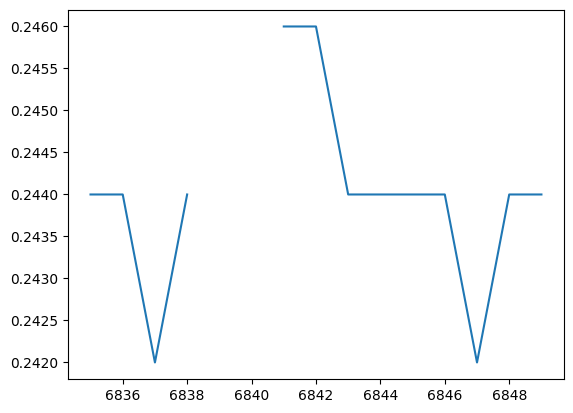

In [16]:
df["Global_active_power"][6835:6850].plot()

Tengo dos alternativas:


1.   Interpolar
2.   Eliminar valores nulos

Voy a interpolar, por las siguientes razones:

*   Tiene sentido que si me falta un valor de medición de consumo de energía eléctrica, entonces este sea un valor intermedio entre los valores mas inmediatos que tengo anterior y posterior
*   De los modelos de series temporales, algunos no funcionan bien si no tengo una serie uniforme en el eje temporal (una medición por minuto)

Dejo comentado el código para eliminar los nulos, no lo voy a usar





In [17]:
# Alternativa 1: interpolo
df = df.interpolate(method='linear', limit_direction='both') # En este caso, no faltan valores extremos (extrapolar)

# Alternativa 2: Elimino valores NaN
# df.dropna(axis=0, inplace=True)

<ipython-input-17-0bee92f78856>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear', limit_direction='both') # En este caso, no faltan valores extremos (extrapolar)


Dado que al tener datos cada 1 minuto las muestras son ruidosas (no hay promediado de ningún tipo), no le veo sentido usar un tipo de interpolación mas costosa computacionalmente que la lineal

Así queda la sección de la serie temporal interpolada

<Axes: >

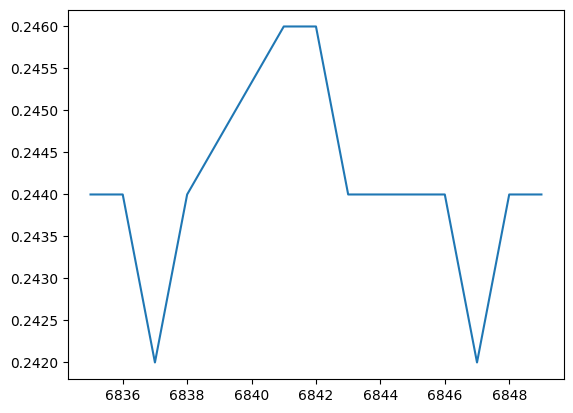

In [18]:
df["Global_active_power"][6835:6850].plot()

In [19]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


Ahora ya está resuelto el problema de los valores faltantes

## Feature Engineering

### Obtención de datos derivados: datetime
A partir de las columnas "Date" y "Time", quiero armar una única que contenga la info de ambas

Antes:

In [20]:
df[["Date","Time"]].head()

,Date,Time
0,16/12/2006,17:24:00
1,16/12/2006,17:25:00
2,16/12/2006,17:26:00
3,16/12/2006,17:27:00
4,16/12/2006,17:28:00


In [21]:
df[["Date","Time"]].dtypes

,0
Date,object
Time,object


Después

In [22]:
# Convierto date de tipo "object" a "datetime"
df['date'] =  pd.to_datetime(df['Date']+' '+df['Time'], infer_datetime_format=True)

<ipython-input-22-5956f0154d8c>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] =  pd.to_datetime(df['Date']+' '+df['Time'], infer_datetime_format=True)
<ipython-input-22-5956f0154d8c>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] =  pd.to_datetime(df['Date']+' '+df['Time'], infer_datetime_format=True)


In [23]:
df[["Date","Time","date"]].head()

,Date,Time,date
0,16/12/2006,17:24:00,2006-12-16 17:24:00
1,16/12/2006,17:25:00,2006-12-16 17:25:00
2,16/12/2006,17:26:00,2006-12-16 17:26:00
3,16/12/2006,17:27:00,2006-12-16 17:27:00
4,16/12/2006,17:28:00,2006-12-16 17:28:00


In [24]:
df[["Date","Time","date"]].dtypes

,0
Date,object
Time,object
date,datetime64[ns]


In [25]:
# Elimino columnas Date y Time, no las voy a usar más
df.drop(labels=['Date','Time'],axis=1, inplace=True)

In [26]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [27]:
df.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
date,datetime64[ns]


### Obtención de datos derivados: potencia aparente
Es la suma de los componente consumo activo y reactivo:

total = sqrt(activo²+reactivo²)

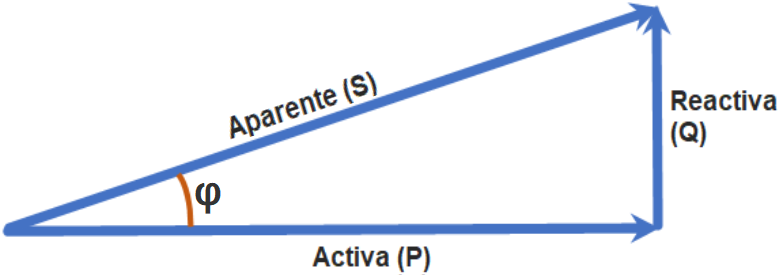

In [28]:
df[["Global_active_power","Global_reactive_power"]].head()

,Global_active_power,Global_reactive_power
0,4.216,0.418
1,5.360,0.436
2,5.374,0.498
3,5.388,0.502
4,3.666,0.528


In [29]:
df.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
date,datetime64[ns]


In [30]:
# El consumo lo calculo como la suma modulo dos de la parte activa y reactiva del consumo
df['Consumption']=np.sqrt(df['Global_active_power']**2+df['Global_reactive_power']**2)

In [31]:
df[["Global_active_power","Global_reactive_power","Consumption"]].head()

,Global_active_power,Global_reactive_power,Consumption
0,4.216,0.418,4.236671
1,5.360,0.436,5.377704
2,5.374,0.498,5.397025
3,5.388,0.502,5.411335
4,3.666,0.528,3.703828


Por ahora mantengo las columnas de potencia activa y reactiva, luego veo si me aportan información

## Outliers

Para los outliers puedo seguir un par de alternativas:


1.   **Por percentil:** Defino un percentil superior y uno inferior, y elimino los valores que están fuera del rango de esos percentiles. Por ejemplo tomo el percentil superior en 0.99 para el consumo, y me da un valor de 700Wh, quiere decir que en todo el dataset el 99% de los datos está debajo de ese valor, y que sólo el 1% del tiempo se superan los 700Wh. Un razonamiento similar para el percentil inferior. De esa forma identifico outliers o valores "raros". Si no quiero eliminar outliers, poner los percentiles en 0 y 1
2.   **Por desviación estándar:** asumiendo que los datos tienen distribución normal, por convención si el valor de un punto de dato está por encima de la media + 3std, o por debajo de media - 3std, se lo puede considerar outlier
3.   **Por conocimiento de negocio:** viendo valores minimos, maximos y medios, puedo identificar si los valores son razonables, para el caso de negocio que estoy analizando





>

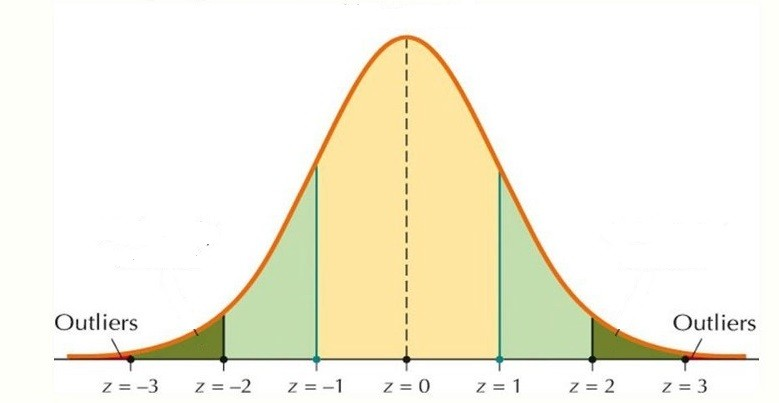

Analisis inicial: para identificar outliers por percentiles y por desviación estándar, hago primero un boxplot de todas las variables

<Axes: >

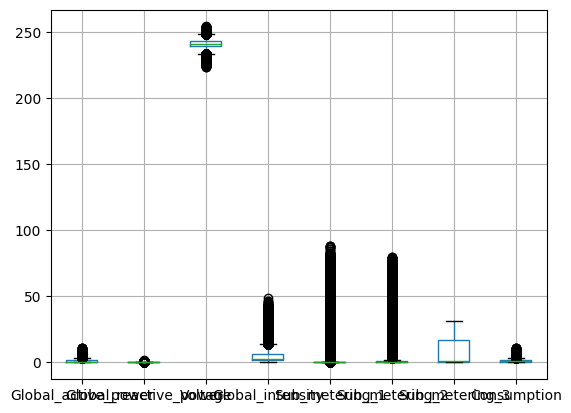

In [32]:
df.boxplot()

Me resulta muy complicado ver la info teniendo las columnas en distintas escalas. Solo con el objetivo de identificar outliers voy a estandarizar las columnas, para ver todo en la misma escala (pierdo referencia de la variable medida, pero es solo para identificar outliers)

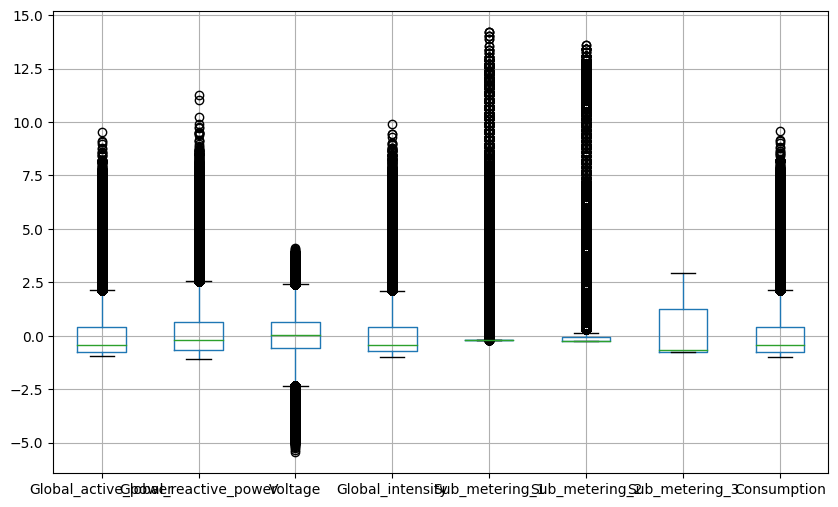

In [33]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df.drop(columns=['date'])), columns=df.drop(columns=['date']).columns) # Como date es dtype=datetime me da problema. La elimino de la grafica

df_standardized.boxplot(figsize=(10, 6))
plt.show()

A priori, las gráficas indican que hay bastantes ouliers. Antes de eliminar los candidatos a ouliers, analizo con conocimiento de negocio en base a los valores típicos para cada columna

In [34]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date,Consumption
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2075259,2.075259e+06
mean,1.090280e+00,1.236492e-01,2.408328e+02,4.621481e+00,1.109485e+00,1.289229e+00,6.442386e+00,2008-12-06 07:12:59.999994112,1.108175e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00,7.600000e-02
25%,3.100000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30,3.330165e-01
50%,6.140000e-01,1.000000e-01,2.410000e+02,2.751585e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00,6.452317e-01
75%,1.528000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30,1.538295e+00
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00,1.112336e+01
std,1.052628e+00,1.124194e-01,3.237763e+00,4.424361e+00,6.115843e+00,5.786613e+00,8.415860e+00,NaN,1.047192e+00


**Potencia:** Dado que la potencia aparente abarca tanto activa como reactiva, y que la reactiva es bastante chica en relación a la activa, voy a analizar solo la aparente. En España, la potencia eléctrica media domiciliaria ronda entre los 3.45 kW y 4.6 kW.

La potencia eléctrica recomendada se puede calcular sumando los kilovatios (kW) de potencia que tiene cada electrodoméstico:

 Televisión (0,5 kW) + Vitrocerámica (1,5 kW) + Lavadora (1,5 kW) + Horno (2 kW) + Lavavajillas (2 kW) + Frigorífico (0,5 kW) + Microondas (1 kW) + Calefacción (2 kW) = 11 kW.

In [35]:
df['Consumption'].describe()

,Consumption
count,2.075259e+06
mean,1.108175e+00
std,1.047192e+00
min,7.600000e-02
25%,3.330165e-01
50%,6.452317e-01
75%,1.538295e+00
max,1.112336e+01


Se ve que el valor minimo de consumo ronda los 0 kW (cuando no hay aparatos encendidos por ejemplo), y el valor máximo es de 11kW, que es un valor razonable para un consumo eléctrico domiciliario. No se identifican outliers con este criterio

**Voltaje:** En Francia, la corriente estándar es de 230 V con una frecuencia de 50 Hz. Los valores minimo y maximo son acordes. No hay ouliers

In [36]:
df['Voltage'].describe()

,Voltage
count,2.075259e+06
mean,2.408328e+02
std,3.237763e+00
min,2.232000e+02
25%,2.389900e+02
50%,2.410000e+02
75%,2.428700e+02
max,2.541500e+02


**Demás columnas:** la corriente por el voltaje da la potencia, y los consumos de los distintos submeterings son siempre menores al total, por lo que son razonables. No se identifican outliers

> Aplicando conocimiento de negocio, identifico que no hay outliers, por lo que no elimino nada. Los datos se ven bastante limpios

In [37]:
# Defino función outliers por percentil
def elimino_percentil(df,inferior,superior):
    # Le cargo solamente los percentil inferior y superior.
    # Ejemplo: si quiero eliminar valores por debajo del 1% y por encima del 99% le cargo elimino_percentil(df,0.01,0.99)
    lower_value = df.Consumption.quantile(inferior) # Percentil 0.1%
    upper_value = df.Consumption.quantile(superior) # Percentil 99.9%
    df.drop(df[(df.Consumption>upper_value)|(df.Consumption<lower_value)].index, axis=0, inplace=True)

    return df

In [38]:
df=elimino_percentil(df,0,1) # Si le paso valores 0 y 1, no elimino nada
#df=elimino_percentil(df,0.001,0.999)

In [39]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date,Consumption
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,4.236671
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,5.377704
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,5.397025
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,5.411335
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,3.703828


In [40]:
df.shape

(2075259, 9)

# EDA: Análisis Exploratorio de Datos

## Estadísticos sobre las columnas

In [41]:
df.describe(include="all")

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date,Consumption
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2075259,2.075259e+06
mean,1.090280e+00,1.236492e-01,2.408328e+02,4.621481e+00,1.109485e+00,1.289229e+00,6.442386e+00,2008-12-06 07:12:59.999994112,1.108175e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00,7.600000e-02
25%,3.100000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30,3.330165e-01
50%,6.140000e-01,1.000000e-01,2.410000e+02,2.751585e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00,6.452317e-01
75%,1.528000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30,1.538295e+00
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00,1.112336e+01
std,1.052628e+00,1.124194e-01,3.237763e+00,4.424361e+00,6.115843e+00,5.786613e+00,8.415860e+00,NaN,1.047192e+00


## Histograma consumo

In [42]:
# Ambas librerías son para graficar
import seaborn as sns
import matplotlib.pyplot as plt

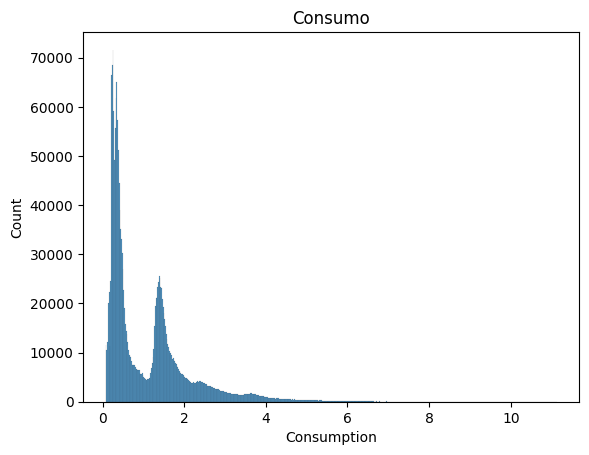

,Consumption
count,2.075259e+06
mean,1.108175e+00
std,1.047192e+00
min,7.600000e-02
25%,3.330165e-01
50%,6.452317e-01
75%,1.538295e+00
max,1.112336e+01


In [43]:
sns.histplot(df.Consumption)
plt.title('Consumo')
plt.show()
df.Consumption.describe()

A continuación dejo una gráfica que muestra con lineas rectas distintas medidas (tendencia central y dispersion)

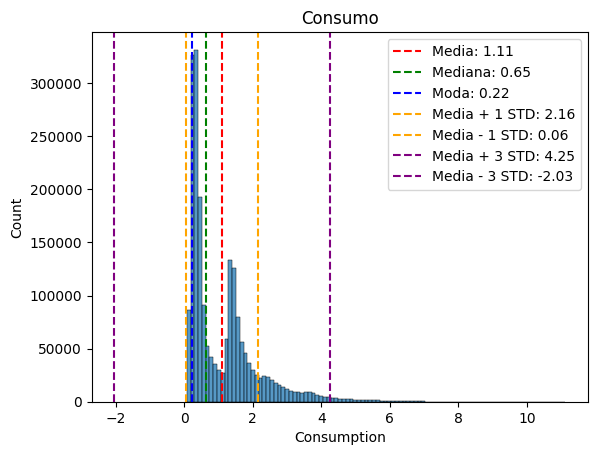

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Calcular las estadísticas
mean = df['Consumption'].mean()
median = df['Consumption'].median()
mode = df['Consumption'].mode()[0]  # Toma la primera moda en caso de que haya varias
std_dev = df['Consumption'].std()

# Crear el histograma
sns.histplot(df['Consumption'], bins=100)
plt.title('Consumo')

# Añadir líneas verticales para media, mediana, moda, y desviaciones estándar
plt.axvline(mean, color='red', linestyle='--', label=f'Media: {mean:.2f}')
plt.axvline(median, color='green', linestyle='--', label=f'Mediana: {median:.2f}')
plt.axvline(mode, color='blue', linestyle='--', label=f'Moda: {mode:.2f}')

# Añadir líneas para las desviaciones estándar
plt.axvline(mean + std_dev, color='orange', linestyle='--', label=f'Media + 1 STD: {mean + std_dev:.2f}')
plt.axvline(mean - std_dev, color='orange', linestyle='--', label=f'Media - 1 STD: {mean - std_dev:.2f}')
plt.axvline(mean + 3*std_dev, color='purple', linestyle='--', label=f'Media + 3 STD: {mean + 3*std_dev:.2f}')
plt.axvline(mean - 3*std_dev, color='purple', linestyle='--', label=f'Media - 3 STD: {mean - 3*std_dev:.2f}')

# Mostrar leyenda
plt.legend()

# Mostrar gráfica
plt.show()

**Prueba de Hartigan's Dip Test**

Se ve que la distribución no es normal. Parece bimodal (tiene dos modas). Hay una prueba que valida esto (aunque ya se ve a simple vista, es interesante hacerla)

Esta es una prueba estadística diseñada específicamente para detectar multimodalidad en una distribución de datos. Es particularmente efectiva para detectar la presencia de más de un pico en una distribución. Se puede usar la librería diptest en Python para aplicar esta prueba.

In [45]:
!pip install diptest

In [46]:
from diptest import diptest

# Hago un sampleo de los datos, ya que si tengo mas de 72000 filas la libreria falla
sample = df['Consumption'].sample(n=72000, random_state=42)

# Calcular el estadístico de Hartigan's Dip Test
dip, p_value = diptest(df['Consumption'].values)
print(f"Dip Statistic: {dip}, p-value: {p_value}")

Dip Statistic: 0.03643985110442611, p-value: 0.0


/usr/local/lib/python3.10/dist-packages/diptest/consts.py:702: UserWarning: Sample size exceeds the maximum limit of 72000. Results may not be accurate with precomputed statistical values.
  warnings.warn(


El **p-value** va entre 0 y 1, e indica la probabilidad de que los datos sean unimodales. Un valor de p bajo (generalmente < 0.05) sugiere que los datos tienen una estructura multimodal.

El **dip** (entre 0 y 0.5) aumenta cuanto mas distinta sea la distribucion de una unimodal

In [47]:
# # Si elimino outliers
# df2=elimino_percentil(df,0,0.99)
# sns.histplot(df2.Consumption)
# plt.title('Consumo')
# plt.show()
# df2.Consumption.describe()

In [48]:
df[["date","Consumption"]].head()

,date,Consumption
0,2006-12-16 17:24:00,4.236671
1,2006-12-16 17:25:00,5.377704
2,2006-12-16 17:26:00,5.397025
3,2006-12-16 17:27:00,5.411335
4,2006-12-16 17:28:00,3.703828


## Análisis eje temporal

In [49]:
print('Inicio: ', df.date.min())
print('Final:  ', df.date.max())
print('Delta:  ', df.date[1]-df.date[0])

# Chequear si faltan datos (líneas completas)
def check_evenly_spacing(df):
  diff = np.diff(df.index.to_numpy()) # Calcula diferencia entre indices sucesivos. Deberia dar un vector con todos unos
  Equally_spaced = np.all(diff==diff[0]) # Si todos los valores son iguales a 1, entonces el dataset está completo y retorna "True"
  return Equally_spaced

print('Dataset completo (lineas): ', check_evenly_spacing(df))

Inicio:  2006-12-16 17:24:00
Final:   2010-11-26 21:02:00
Delta:   0 days 00:01:00
Dataset completo (lineas):  True


## Consumo activo vs reactivo por zonas

Como nota, submetering 1 es la cocina, submetering 2 el lavadero, y submetering 3 es calefón y aire (climatización)

### Gráfico de barras

In [50]:
# Calcula la potencia total activa y reactiva consumida por cada sub-metering
df['Total_active_power_1'] = df['Global_active_power'] * (df['Sub_metering_1'] / df['Global_intensity'])
df['Total_active_power_2'] = df['Global_active_power'] * (df['Sub_metering_2'] / df['Global_intensity'])
df['Total_active_power_3'] = df['Global_active_power'] * (df['Sub_metering_3'] / df['Global_intensity'])

df['Total_reactive_power_1'] = df['Global_reactive_power'] * (df['Sub_metering_1'] / df['Global_intensity'])
df['Total_reactive_power_2'] = df['Global_reactive_power'] * (df['Sub_metering_2'] / df['Global_intensity'])
df['Total_reactive_power_3'] = df['Global_reactive_power'] * (df['Sub_metering_3'] / df['Global_intensity'])

# Calcula el promedio de la potencia total activa y reactiva para cada sub-metering
avg_powers = df[['Total_active_power_1', 'Total_reactive_power_1',
                 'Total_active_power_2', 'Total_reactive_power_2',
                 'Total_active_power_3', 'Total_reactive_power_3']].mean()

print(avg_powers)

Total_active_power_1      0.261235
Total_reactive_power_1    0.014649
Total_active_power_2      0.300521
Total_reactive_power_2    0.037120
Total_active_power_3      1.542442
Total_reactive_power_3    0.123724
dtype: float64


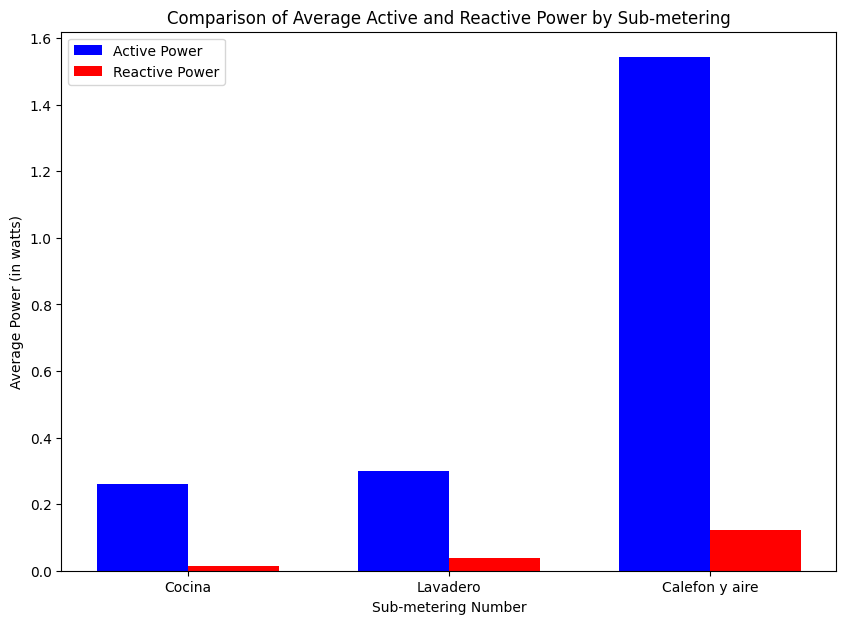

In [51]:
# Calculamos los promedios para cada categoría
average_powers = {
    'Active Power 1': df['Total_active_power_1'].mean(),
    'Reactive Power 1': df['Total_reactive_power_1'].mean(),
    'Active Power 2': df['Total_active_power_2'].mean(),
    'Reactive Power 2': df['Total_reactive_power_2'].mean(),
    'Active Power 3': df['Total_active_power_3'].mean(),
    'Reactive Power 3': df['Total_reactive_power_3'].mean()
}

# Convertimos los promedios a un DataFrame para facilitar la manipulación
power_data = pd.DataFrame(list(average_powers.items()), columns=['Type', 'Average Power'])
power_data['Sub-metering'] = power_data['Type'].str.extract('(\d+)')
power_data['Power Type'] = power_data['Type'].str.extract('(Active|Reactive)')

# Preparando la estructura para el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 7))
width = 0.35  # ancho de las barras
sub_metering_positions = np.arange(1, 4)  # posiciones de sub-metering [1, 2, 3]

# Dibuja barras para potencia activa
active_powers = power_data[power_data['Power Type'] == 'Active']['Average Power'].values
ax.bar(sub_metering_positions - width/2, active_powers, width, label='Active Power', color='b')

# Dibuja barras para potencia reactiva
reactive_powers = power_data[power_data['Power Type'] == 'Reactive']['Average Power'].values
ax.bar(sub_metering_positions + width/2, reactive_powers, width, label='Reactive Power', color='r')

# Configuración del gráfico
ax.set_xlabel('Sub-metering Number')
ax.set_ylabel('Average Power (in watts)')
ax.set_title('Comparison of Average Active and Reactive Power by Sub-metering')
ax.set_xticks(sub_metering_positions)
ax.set_xticklabels(['Cocina', 'Lavadero', 'Calefon y aire'])
ax.legend()

plt.show()

Se puede concluir que:

*   El consumo reactivo es mucho menor al activo para todas las zonas
*   Calefon y aire son los aparatos que mas consumen en promedio en toda la casa
*   Cocina y lavadero consumen una potencia similar



### Grafico de torta

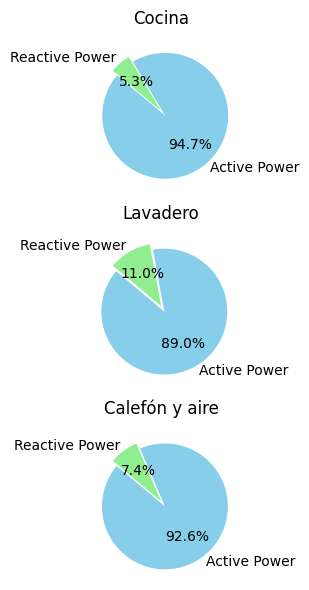

In [52]:
# Calculamos los promedios para cada categoría
average_powers = {
    'Active Power 1': df['Total_active_power_1'].mean(),
    'Reactive Power 1': df['Total_reactive_power_1'].mean(),
    'Active Power 2': df['Total_active_power_2'].mean(),
    'Reactive Power 2': df['Total_reactive_power_2'].mean(),
    'Active Power 3': df['Total_active_power_3'].mean(),
    'Reactive Power 3': df['Total_reactive_power_3'].mean()
}

# Preparando los datos para cada sub-metering
labels = ['Active Power', 'Reactive Power']
colors = ['skyblue', 'lightgreen']
explode = (0.1, 0)  # resaltar la potencia activa

# Crear figuras de torta para cada sub-metering
fig, axes = plt.subplots(3, 1, figsize=(18, 6))  # tres gráficos de torta en una fila

# Sub-metering 1
sizes = [average_powers['Active Power 1'], average_powers['Reactive Power 1']]
axes[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# axes[0].set_title('Sub-metering 1')
axes[0].set_title('Cocina')

# Sub-metering 2
sizes = [average_powers['Active Power 2'], average_powers['Reactive Power 2']]
axes[1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# axes[1].set_title('Sub-metering 2')
axes[1].set_title('Lavadero')

# Sub-metering 3
sizes = [average_powers['Active Power 3'], average_powers['Reactive Power 3']]
axes[2].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# axes[2].set_title('Sub-metering 3')
axes[2].set_title('Calefón y aire')

plt.tight_layout()
plt.show()

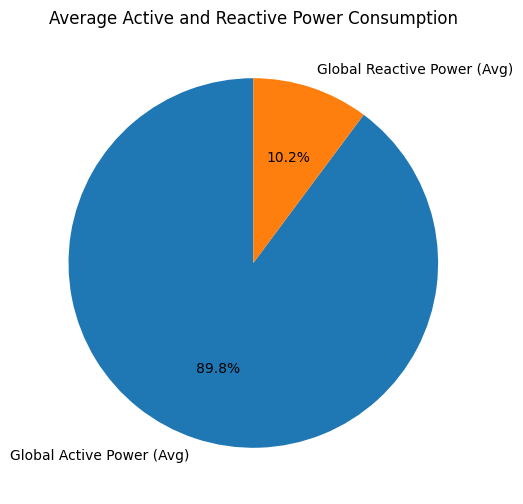

In [53]:
# Calcula el promedio de las potencias activa y reactiva
average_active_power = df['Global_active_power'].mean()
average_reactive_power = df['Global_reactive_power'].mean()

# Crea un diccionario con los valores obtenidos para hacer el gráfico
data = {
    'Global Active Power (Avg)': average_active_power,
    'Global Reactive Power (Avg)': average_reactive_power
}

# Crea un DataFrame a partir del diccionario
power_data = pd.DataFrame(list(data.items()), columns=['Type', 'Power'])

# Genera el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(power_data['Power'], labels=power_data['Type'], autopct='%1.1f%%', startangle=90)
plt.title('Average Active and Reactive Power Consumption')
plt.show()

Se concluye que en todos los casos, la potencia reactiva es mucho menor a la activa

In [54]:
# Elimino columnas que no voy a usar más
df.drop(columns=['Total_active_power_1',
                 'Total_active_power_2',
                 'Total_active_power_3',
                 'Total_reactive_power_1',
                 'Total_reactive_power_2',
                 'Total_reactive_power_3'],
        inplace = True)

## Gráficos en diferentes ventanas temporales
Asumo que hay periodicidad en la serie temporal (hay patrones que se repiten). Bajo este supuesto, hago graficas en distintos periodos temporales para validarlo

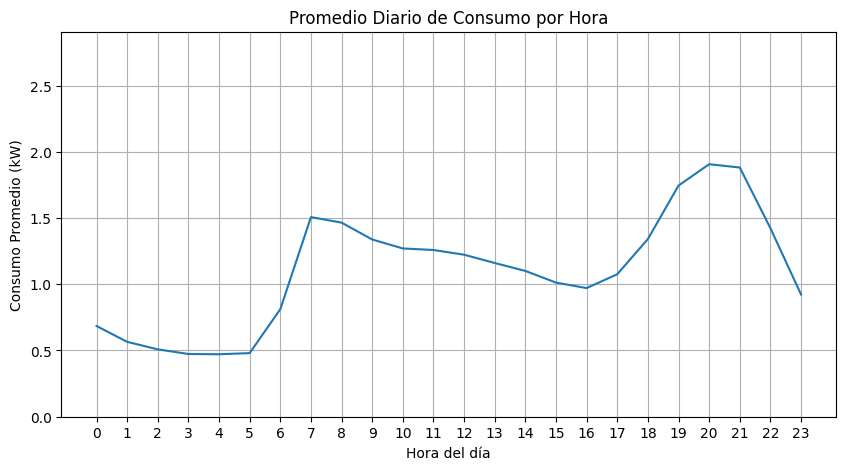

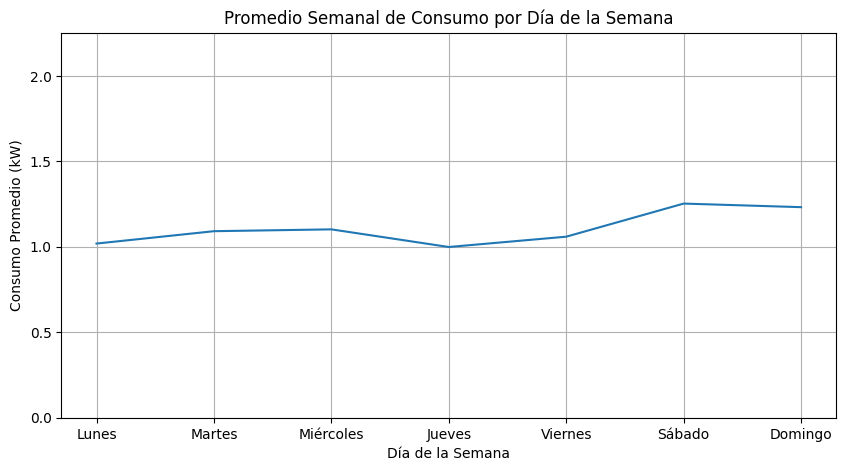

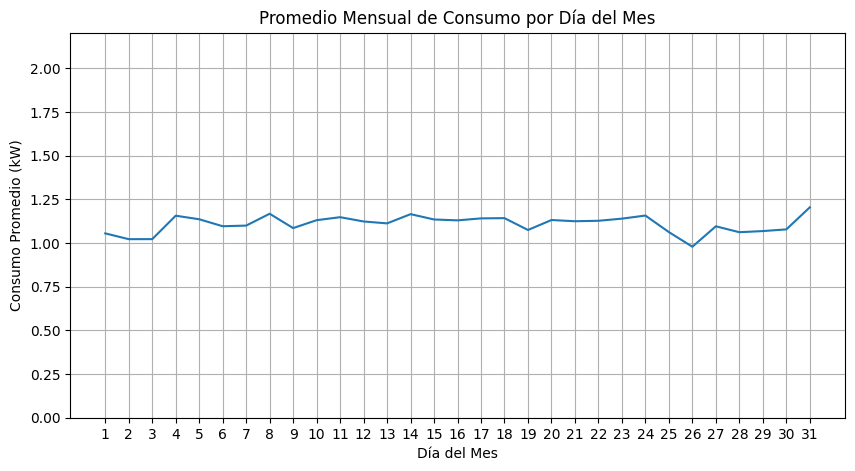

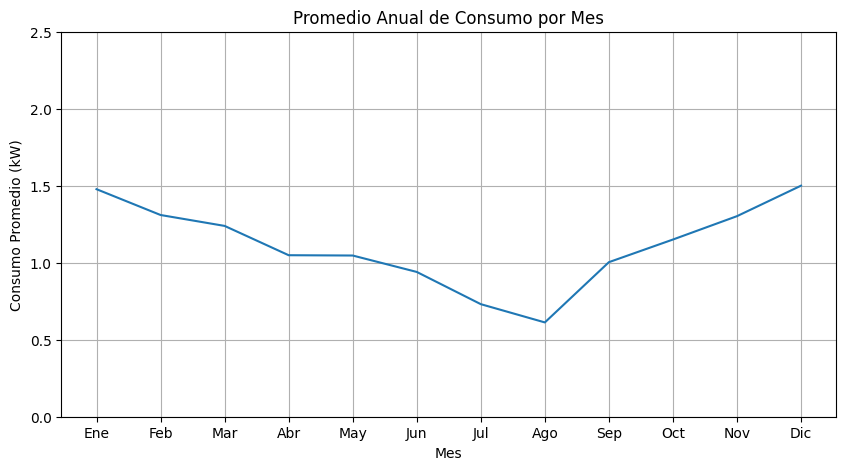

In [55]:
# Asegurar que 'date' es de tipo datetime y establecer como índice
#df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Gráfico diario (Promedio por hora del día)
daily = df['Consumption'].groupby(df.index.hour).mean()
plt.figure(figsize=(10, 5))
daily.plot(title='Promedio Diario de Consumo por Hora')
plt.xlabel('Hora del día')
plt.ylabel('Consumo Promedio (kW)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.ylim(0, daily.max() + 1)
plt.show()

# Gráfico semanal (Promedio por día de la semana)
weekly = df['Consumption'].groupby(df.index.dayofweek).mean()
plt.figure(figsize=(10, 5))
weekly.plot(title='Promedio Semanal de Consumo por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Consumo Promedio (kW)')
plt.xticks(range(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.grid(True)
plt.ylim(0, weekly.max() + 1)
plt.show()

# Gráfico mensual (Promedio por día del mes)
monthly = df['Consumption'].groupby(df.index.day).mean()
plt.figure(figsize=(10, 5))
monthly.plot(title='Promedio Mensual de Consumo por Día del Mes')
plt.xlabel('Día del Mes')
plt.ylabel('Consumo Promedio (kW)')
plt.xticks(range(1, 32))
plt.grid(True)
plt.ylim(0, monthly.max() + 1)
plt.show()

# Gráfico anual (Promedio por mes del año)
annual = df['Consumption'].groupby(df.index.month).mean()
plt.figure(figsize=(10, 5))
annual.plot(title='Promedio Anual de Consumo por Mes')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio (kW)')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True)
plt.ylim(0, annual.max() + 1)
plt.show()

Conclusiones (dominio temporal)

* De la gráfica para un día, se ve que hay aumento del consumo a la hora que la gente despierta, y a la hora de volver del trabajo, y durante horas de la noche el consumo baja
* De la gráfica para la semana, se ve un consumo parejo los días de semana, y el consumo aumenta los días sabado y domingo
* Respecto al día del mes, si bien hay fluctuaciones el consumo es bastante parejo
* En la gráfica para todo el año se ve un comportamiento interesante, la curva hace una "V" donde el mínimo cae en agosto. Esto tiene lógica porque el dataset tiene datos de una casa en francia, donde el mínimo consumo coincide con el verano (junio-septiembre), y el invierno (diciembre-marzo) es donde se registran los picos.

Es interesante seguir analizando la gráfica anual. Dejo una imagen con la temperatura promedio a lo largo del año

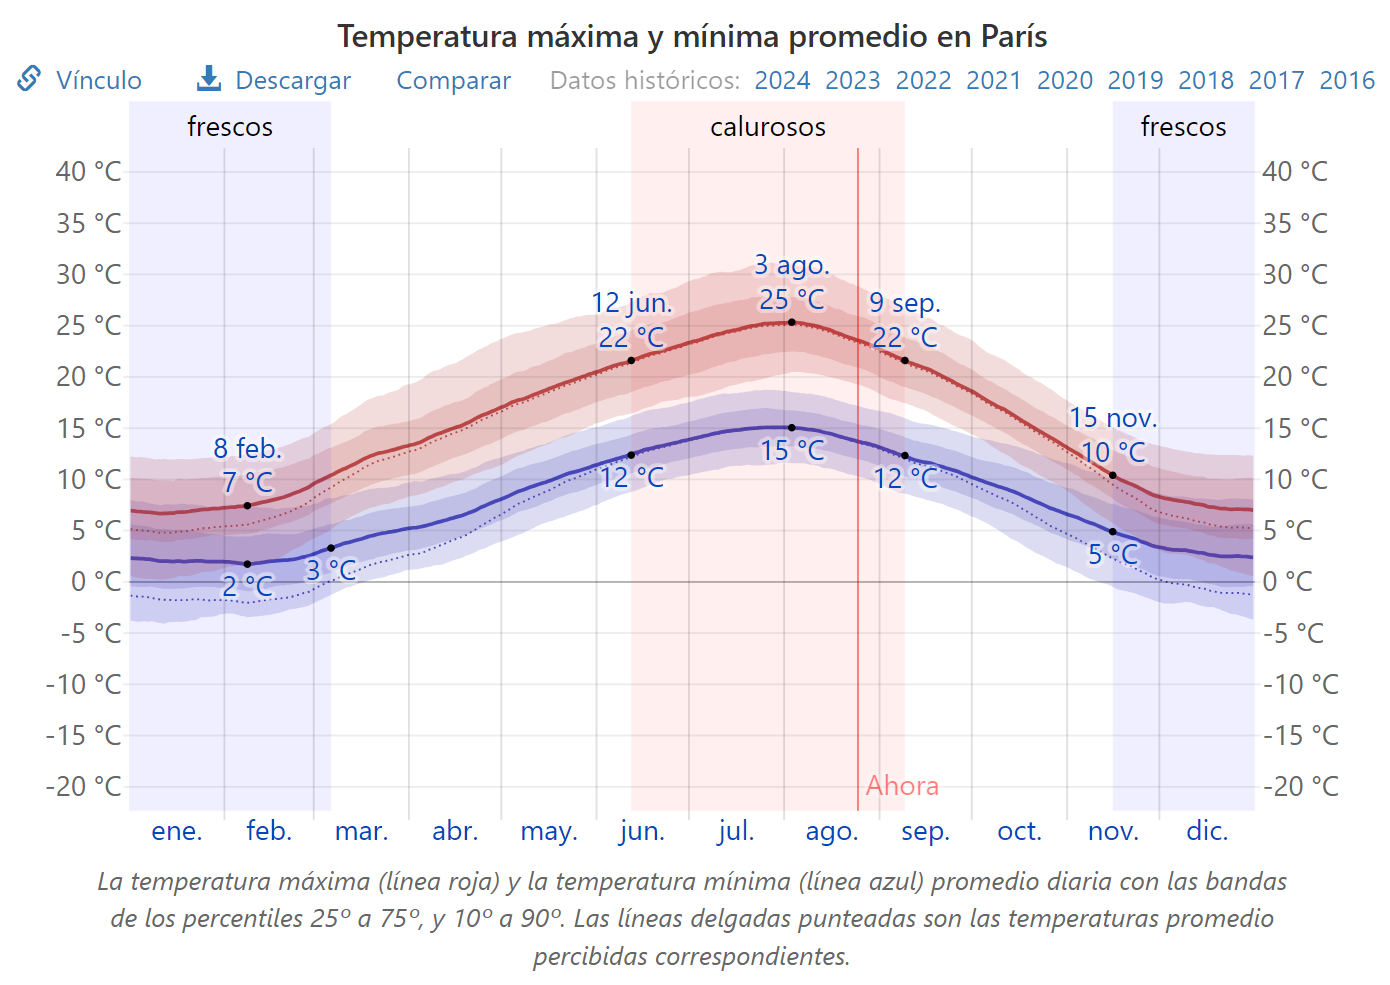

Se ve claramente una relación inversamente proporcional entre la temperatura y el consumo (+ temperatura - consumo).

Investigando un poco más, en Francia se usan muy poco los aires acondicionados (solo el 4% del total de la poblacion tiene aires) https://elcablefrances.substack.com/p/por-que-no-hay-aire-acondicionado

El consumo máximo ocurre entre diciembre y enero, que es la época de más frio (cuando más se usa la calefacción). Esto va acorde al gráfico de barras que indica que la subzona asociada a calefacción es la que más consume en toda la casa, y al gráfico siguiente que indica que estos aparatos son los que mas consumen en diciembre y enero

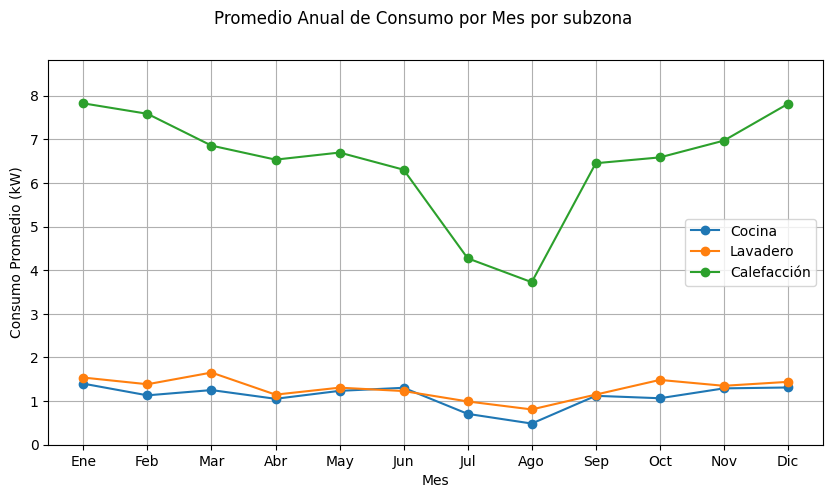

In [56]:
# Gráfico anual (Promedio por mes del año)
annual1 = df['Sub_metering_1'].groupby(df.index.month).mean()
annual2 = df['Sub_metering_2'].groupby(df.index.month).mean()
annual3 = df['Sub_metering_3'].groupby(df.index.month).mean()

plt.figure(figsize=(10, 5))

# Graficar cada serie por separado
plt.plot(annual1, label='Cocina', marker='o')
plt.plot(annual2, label='Lavadero', marker='o')
plt.plot(annual3, label='Calefacción', marker='o')

# Configurar etiquetas y títulos
plt.suptitle('Promedio Anual de Consumo por Mes por subzona')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio (kW)')

# Etiquetas del eje x con los nombres de los meses
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar la leyenda y configurar el grid
plt.legend()
plt.grid(True)

# Ajustar el límite del eje y
plt.ylim(0, max(annual1.max(), annual2.max(), annual3.max()) + 1)

# Mostrar la gráfica
plt.show()

Se valida que en los meses de mas calor (dic-ene) hay un pico en el consumo de calefacción, y estos aparatos son los que mas influyen en el consumo total

## Analisis en dominio Fourier
Quiero validar si las ventanas temporales que elegí en la parte anterior tienen sentido. Para esto, transformo del dominio del tiempo al de la frecuencia, y miro que ventanas temporales tienen picos

<ipython-input-57-6c1666f244d0>:10: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


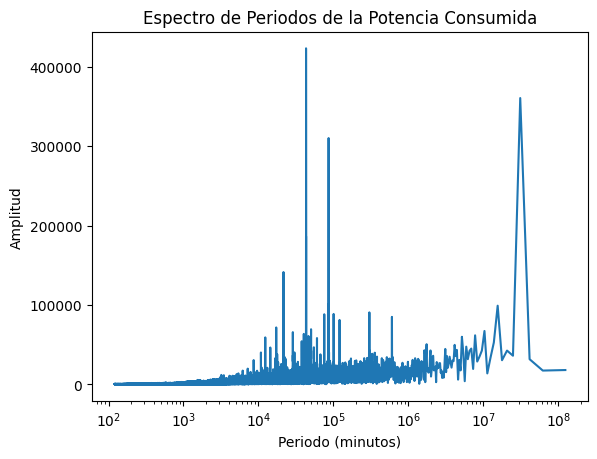

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Aplicar la Transformada Rápida de Fourier (FFT)
fft_result = np.fft.fft(df['Consumption'])
frequencies = np.fft.fftfreq(len(df['Consumption']), d=60)  # d=60 segundos (un minuto entre mediciones)
amplitudes = np.abs(fft_result)

# Convertir frecuencias a periodos (en minutos)
periods = 1 / frequencies

# Graficar el espectro de periodos (eliminar las frecuencias negativas)
plt.plot(periods[:len(periods)//2], np.abs(fft_result)[:len(frequencies)//2])
plt.title('Espectro de Periodos de la Potencia Consumida')
plt.xlabel('Periodo (minutos)')
plt.ylabel('Amplitud')
plt.xscale('log')  # Opcional: Escala logarítmica si los periodos varían mucho
plt.show()

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def obtener_top_n_maximos(frequencies, amplitudes, n_maximos=3):
    """
    Obtiene los n valores máximos de amplitud junto con sus periodos correspondientes (en minutos).

    Parámetros:
    - frequencies: array de las frecuencias.
    - amplitudes: array de las amplitudes correspondientes a la FFT.
    - n_maximos: cantidad de máximos a obtener (por defecto 3).

    Retorna:
    - top_n_periods: array con los n periodos correspondientes a las mayores amplitudes (en minutos).
    - top_n_amplitudes: array con las n amplitudes más grandes.
    """
    # Convertir frecuencias a periodos en minutos (frecuencia en Hz -> periodo en segundos -> minutos)
    periods = 1 / frequencies / 60  # Convertir frecuencias (Hz) a periodos en minutos
    amplitudes = np.abs(amplitudes)

    # Considerar solo los valores con periodos positivos (frecuencias positivas)
    positive_periods = periods[:len(periods)//2]
    positive_amplitudes = amplitudes[:len(amplitudes)//2]

    # Encontrar los índices de los n máximos
    top_n_indices = np.argsort(positive_amplitudes)[-n_maximos:]  # Obtener los índices de los máximos

    # Obtener los valores correspondientes de periodo y amplitud
    top_n_periods = positive_periods[top_n_indices]
    top_n_amplitudes = positive_amplitudes[top_n_indices]

    # Ordenar los resultados por tiempo (periodo) de manera ascendente
    sorted_indices = np.argsort(top_n_periods)
    top_n_periods = top_n_periods[sorted_indices]
    top_n_amplitudes = top_n_amplitudes[sorted_indices]

    return top_n_periods, top_n_amplitudes


# Obtener los n máximos valores de amplitudes y periodos (en minutos)
n_maximos = 5  # Puedes cambiar este valor a cualquier número de máximos que desees
top_periods, top_amplitudes = obtener_top_n_maximos(frequencies, amplitudes, n_maximos=n_maximos)

# Imprimir los máximos
for i in range(n_maximos):
    print(f"Máximo {i+1}: Periodo = {top_periods[i]:.2f} minutos, Amplitud = {top_amplitudes[i]:.2f}")

# Convertir frecuencias a periodos (en minutos) para la gráfica
periods = 1 / frequencies / 60  # Convertir a minutos

<ipython-input-58-edd113e85205>:18: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies / 60  # Convertir frecuencias (Hz) a periodos en minutos


Máximo 1: Periodo = 719.83 minutos, Amplitud = 186444.85
Máximo 2: Periodo = 720.08 minutos, Amplitud = 423144.55
Máximo 3: Periodo = 1440.15 minutos, Amplitud = 310121.87
Máximo 4: Periodo = 518814.75 minutos, Amplitud = 360517.39
Máximo 5: Periodo = inf minutos, Amplitud = 2299750.07


<ipython-input-58-edd113e85205>:49: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies / 60  # Convertir a minutos


Se observa que hay periodicidad cada medio dia (720 minutos), un dia (1440 minutos) y 1 año (518814.75 minutos). Las ventanas que elegi intuitivamente tienen sentido, pero hay una componente importante tambien en medio día que no tuve en cuenta.

## Seasonal decompose (periodo de un año)
Dejo un codigo interesante que encontré, le paso el dataframe y te lo descompone automáticamente en trend, seasonal y residual.

https://towardsdatascience.com/time-series-decomposition-and-statsmodels-parameters-69e54d035453

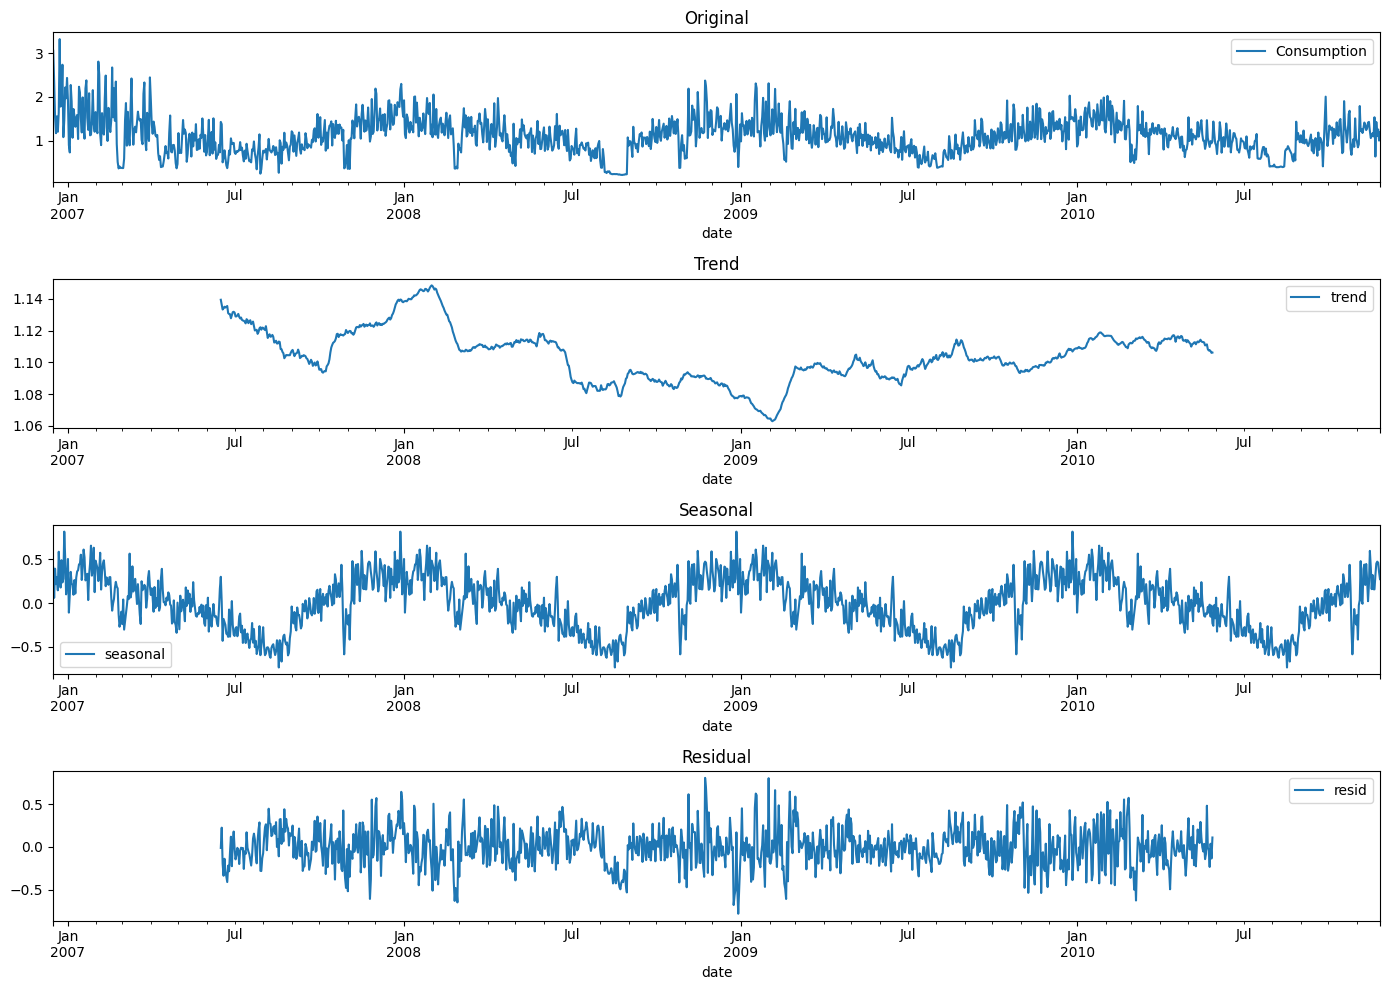

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

daily_data = df['Consumption'].resample('D').mean().dropna()
decomposition = seasonal_decompose(daily_data, model='additive', period=365)

# Plotting the decomposition
fig, axes = plt.subplots(4, 1, figsize=(14, 10))
decomposition.observed.plot(ax=axes[0], title='Original', legend=True)
decomposition.trend.plot(ax=axes[1], title='Trend', legend=True)
decomposition.seasonal.plot(ax=axes[2], title='Seasonal', legend=True)
decomposition.resid.plot(ax=axes[3], title='Residual', legend=True)
plt.tight_layout()
plt.show()

## Grafico de dispersion

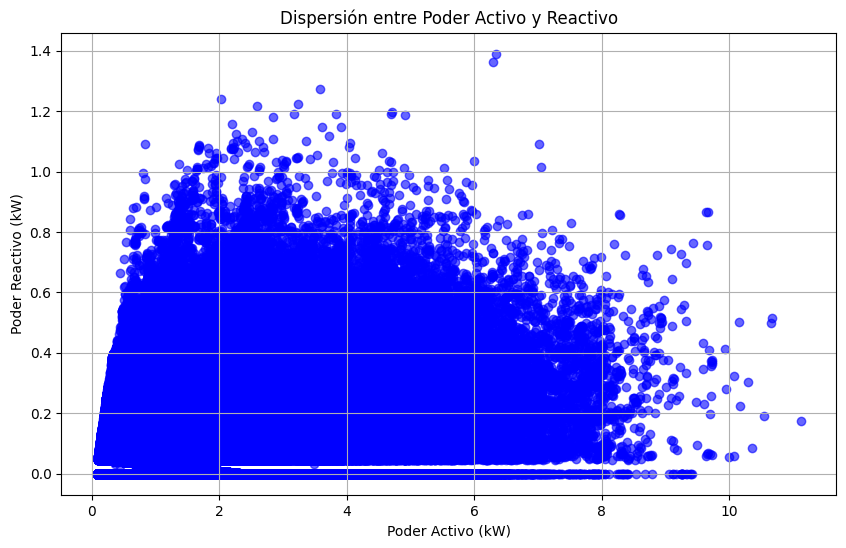

In [60]:
# Gráfico de dispersión entre Poder Activo y Reactivo
plt.figure(figsize=(10, 6))
plt.scatter(df['Global_active_power'], df['Global_reactive_power'], alpha=0.6, color='blue')
plt.title('Dispersión entre Poder Activo y Reactivo')
plt.xlabel('Poder Activo (kW)')
plt.ylabel('Poder Reactivo (kW)')
plt.grid(True)
plt.show()

No se ve nada concluyente, no se observa correlacion a simple vista

## Lineas de intensidad y voltaje

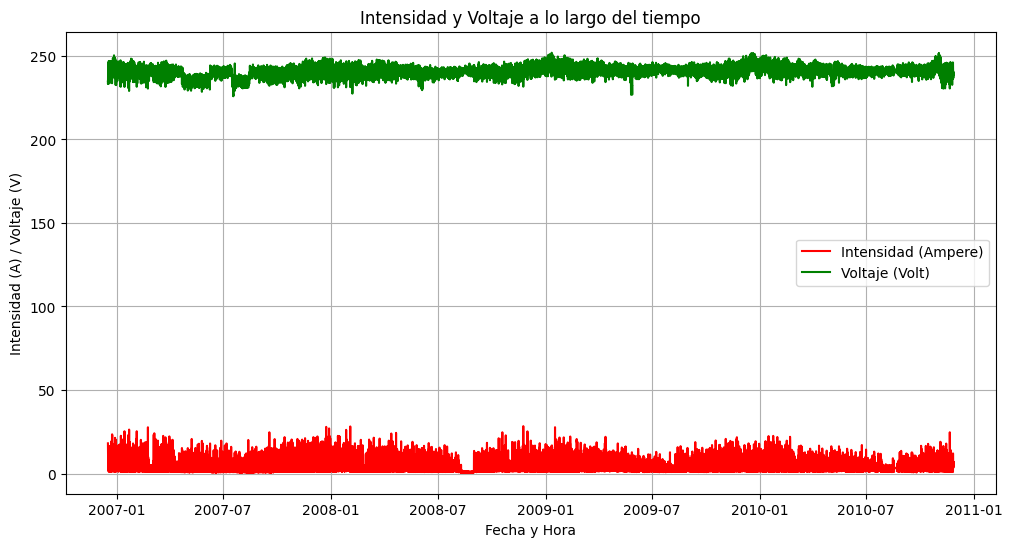

In [61]:
hourly_data = df.resample('H').mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index, hourly_data['Global_intensity'], label='Intensidad (Ampere)', color='red')
plt.plot(hourly_data.index, hourly_data['Voltage'], label='Voltaje (Volt)', color='green')
plt.title('Intensidad y Voltaje a lo largo del tiempo')
plt.xlabel('Fecha y Hora')
plt.ylabel('Intensidad (A) / Voltaje (V)')
plt.legend()
plt.grid(True)
plt.show()

El voltaje y corriente tienen valores correctos. En Francia la red tiene 220V. El voltaje fluctua poco

## Gráfico de Barras Acumulativas de Consumo por Sub-medidores

<Figure size 1200x600 with 0 Axes>

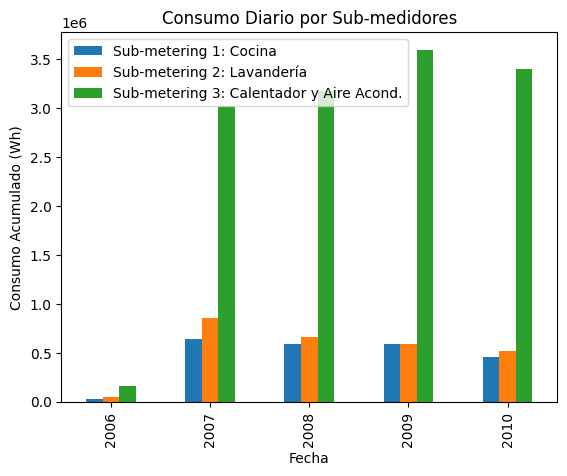

In [62]:
yearly_data = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].resample('Y').sum()

plt.figure(figsize=(12, 6))
yearly_data.plot(kind='bar', stacked=False)
plt.title('Consumo Diario por Sub-medidores')
plt.xlabel('Fecha')
plt.xticks(range(0, 5), ['2006', '2007', '2008', '2009', '2010'])
plt.ylabel('Consumo Acumulado (Wh)')
plt.legend(['Sub-metering 1: Cocina', 'Sub-metering 2: Lavandería', 'Sub-metering 3: Calentador y Aire Acond.'])
plt.show()

Todos los años son bastante parejos. 2006 tiene valores mucho mas chicos porque el dataset inicia a finales de 2006 (hay pocos datos para este año)

## Mapa de Calor de Correlación entre Variables

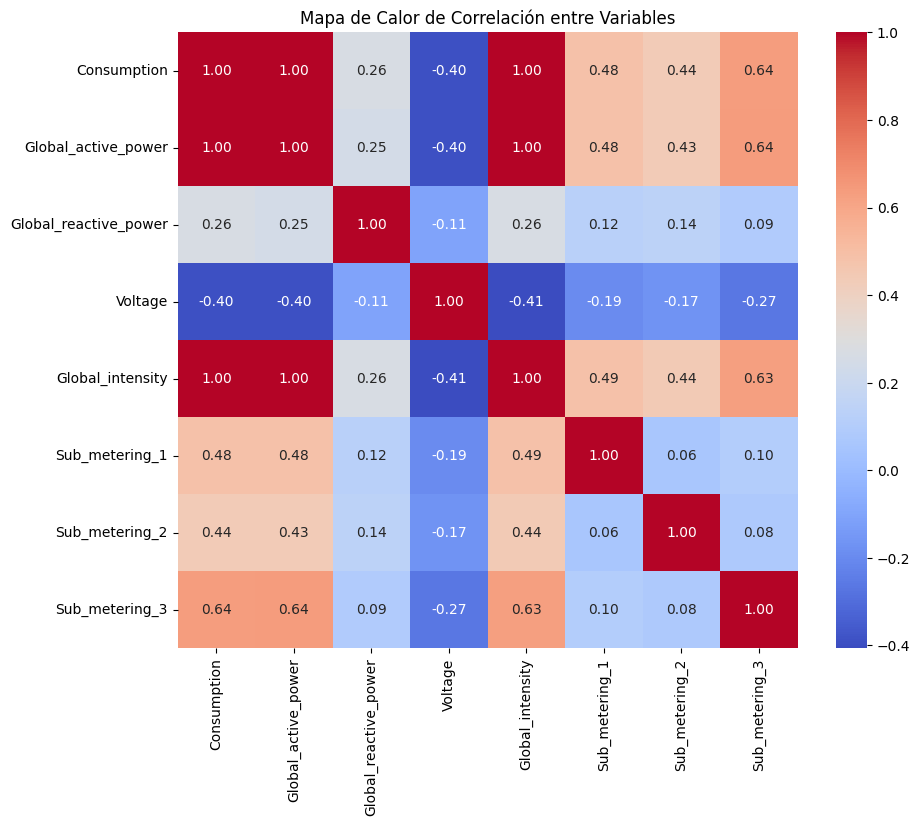

In [63]:
correlation_matrix = df[['Consumption','Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()

Se observa:


*   Altisima correlacion positiva entre corriente, potencia activa global y potencia aparente (Consumption)
*   Correlacion positiva entre Consumption y las subzonas (tiene sentido)
*   Correlacion inversa con el voltaje (no entiendo por que, si potencia=voltaje*corriente)



## Eliminación de columnas que no aportan información

>Esto es parte del feature engineering (que lo hice previo a EDA). Me pareció que se podia sacar información interesante de estas columnas, por más que en el modelo final no las use. Por eso elimino estas variables luego del EDA y no durante la parte de preprocesamiento

Bajo el principio de parsimonia, busco quedarme con las variables que más información me aporten, y eliminar las demás para entrenar un modelo más simple

Dejo un pairplot (con el codigo comentado, por el tiempo que demora) para ver la relación entre variables

In [64]:
# # Para graficar todas las variables
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.pairplot(df, corner="True", diag_kind="kde")
# plt.suptitle('Scatterplot Matrix de Variables de Energía', y=1.02)  # Ajusta el título y su posición
# plt.show()

In [65]:
# # Para graficar solo algunas variables
# variables_to_plot=["Consumption", "Global_active_power","Global_reactive_power", "Global_intensity", "Sub_metering_1"]
# sns.pairplot(df[variables_to_plot], corner="True", diag_kind="kde")
# plt.suptitle('Scatterplot Matrix de Variables de Energía', y=1.02)  # Ajusta el título y su posición
# plt.show()

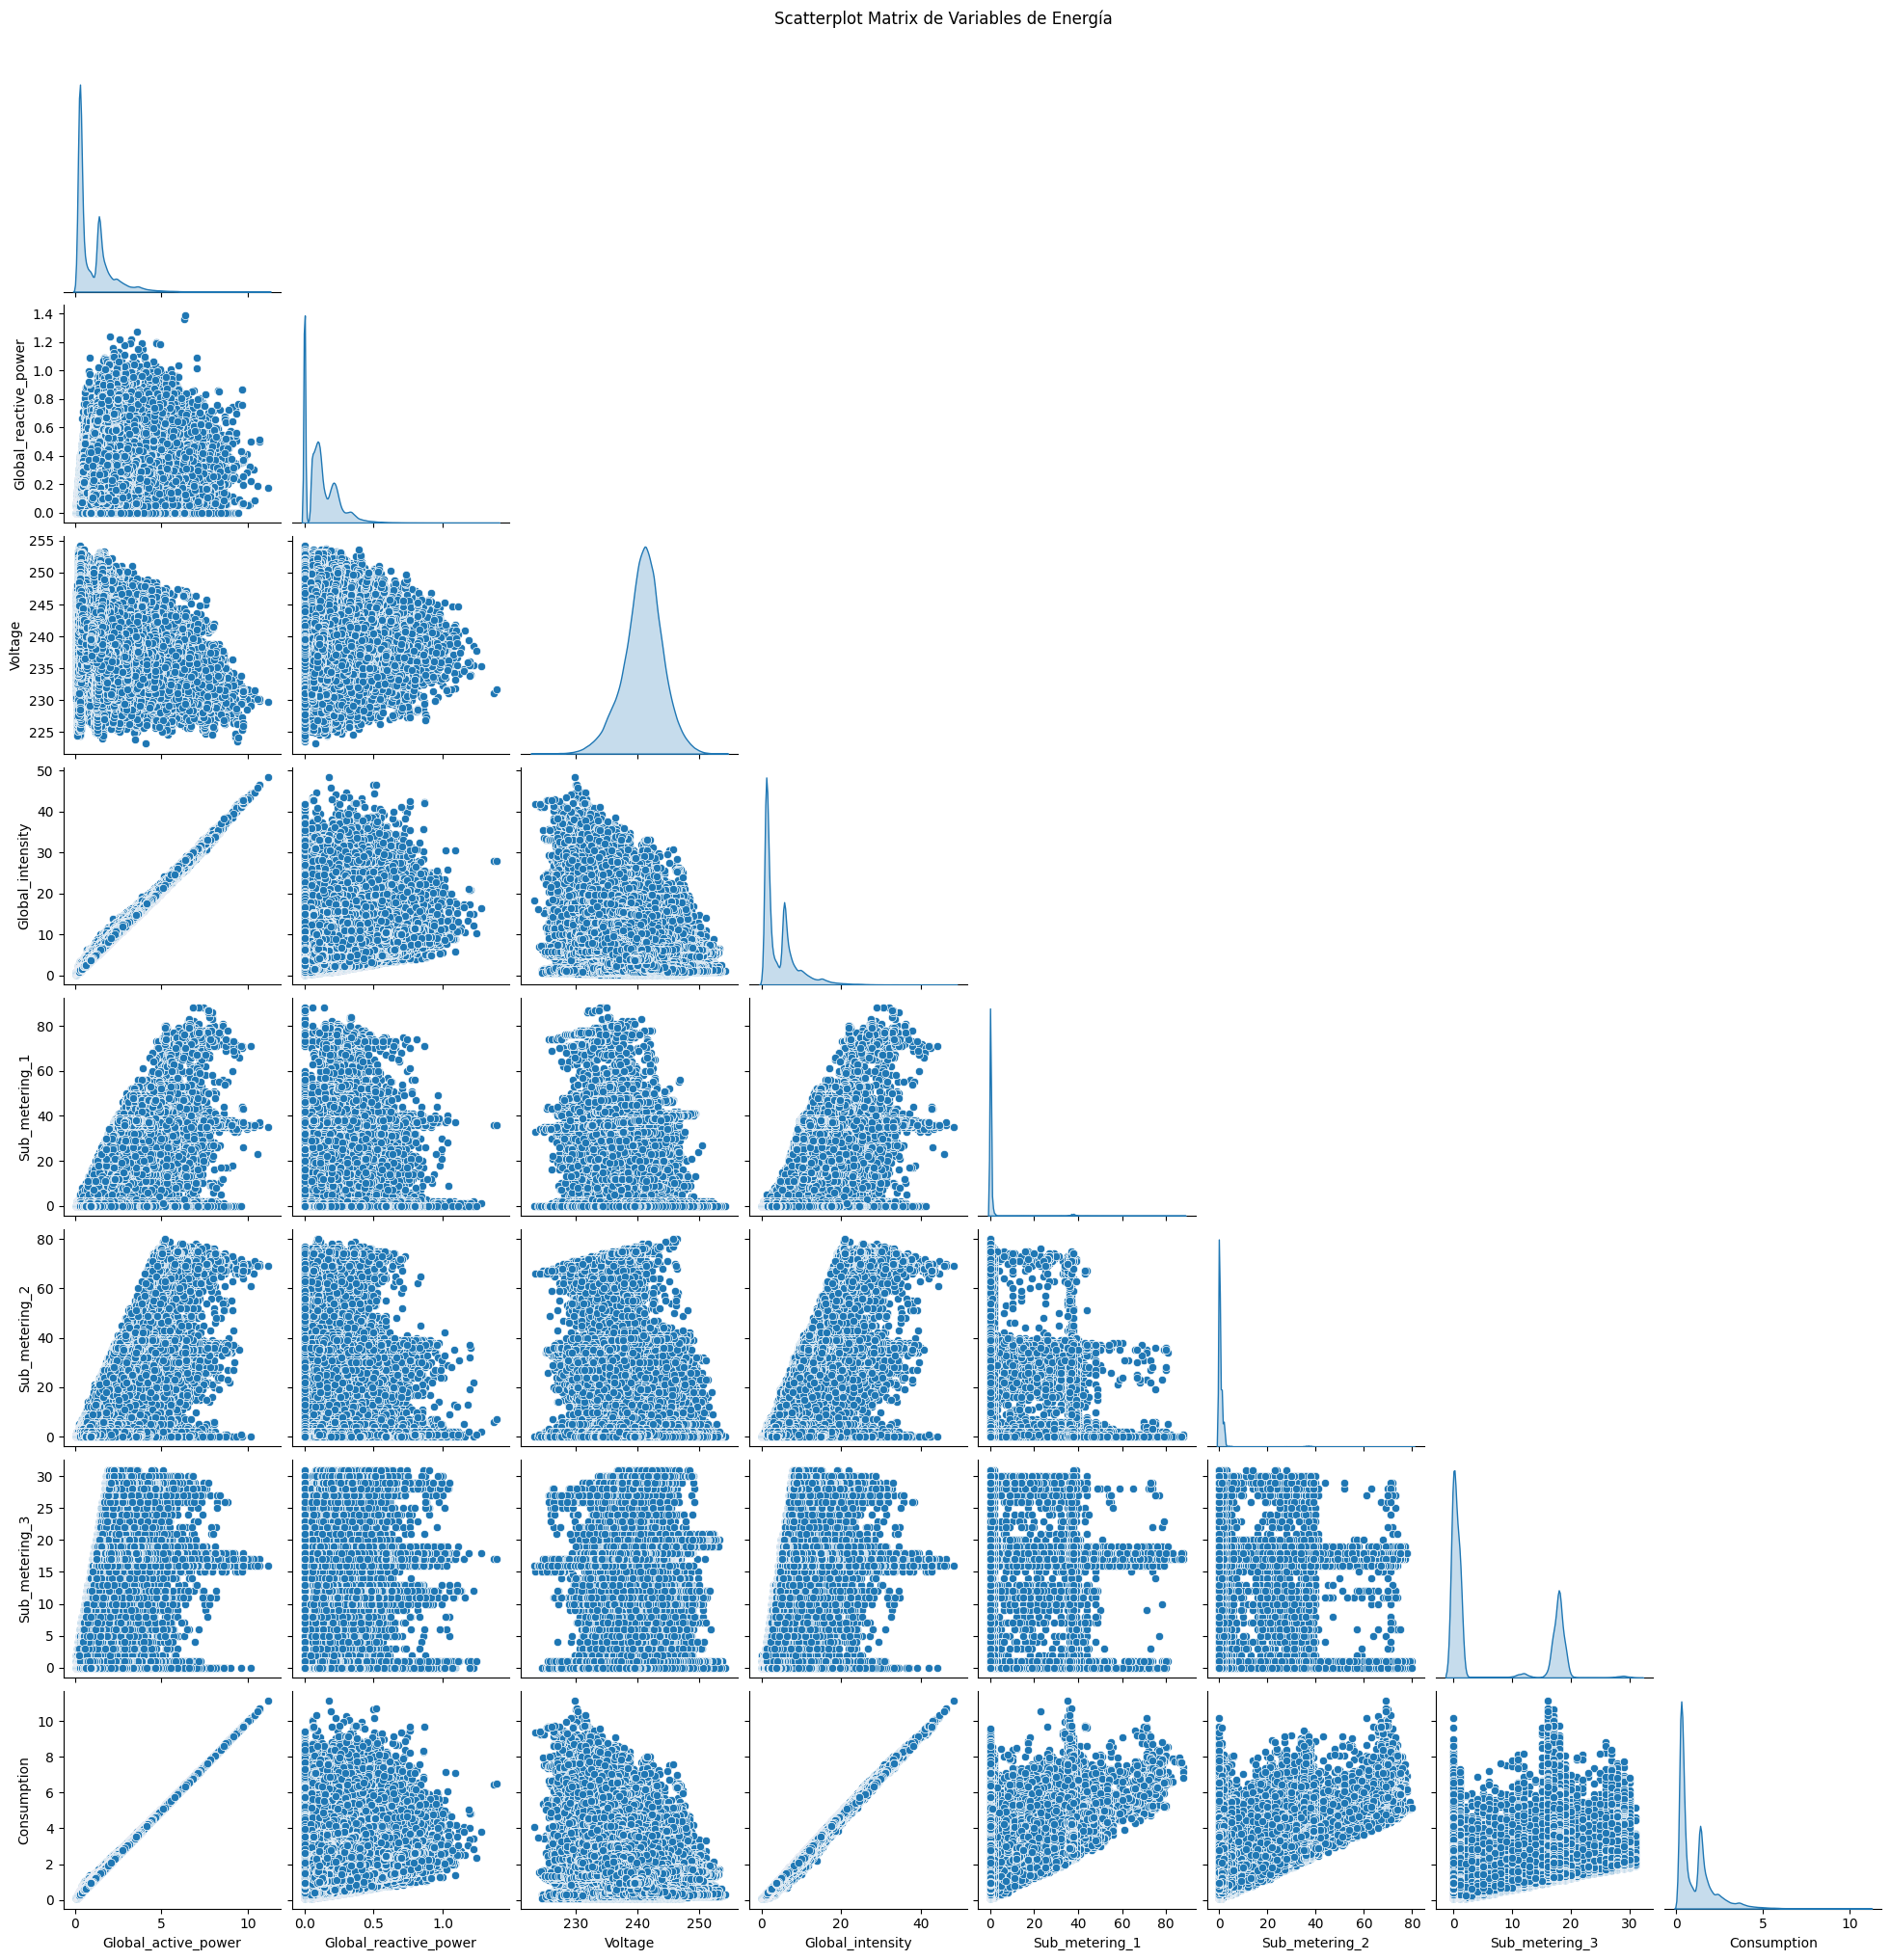

Las relaciones que se ven en el scatterplot son las mismas que en el heatmap

**Potencia activa y corriente global**

A priori se ve que Global_active_power, Consumption y Global_intensity tienen una relación lineal (está clarito en la gráfica). Voy a hacer **prueba de Pearson** para validarlo

In [66]:
correlation = df[['Global_active_power', 'Global_intensity', 'Consumption']].corr(method='pearson')
print(correlation)

                     Global_active_power  Global_intensity  Consumption
Global_active_power             1.000000          0.998887     0.999707
Global_intensity                0.998887          1.000000     0.999162
Consumption                     0.999707          0.999162     1.000000


Como los valores son prácticamente iguales a 1, asumo correlación lineal fuerte positiva. Puedo eliminar Global_intensity y Global_active_power que no me aportan información adicional. Me quedo con "Consumption" que será mi variable objetivo a predecir

In [67]:
df.drop(columns=['Global_active_power', 'Global_intensity'], inplace=True)

In [68]:
df.head()

,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Consumption
date,,,,,,
2006-12-16 17:24:00,0.418,234.84,0.0,1.0,17.0,4.236671
2006-12-16 17:25:00,0.436,233.63,0.0,1.0,16.0,5.377704
2006-12-16 17:26:00,0.498,233.29,0.0,2.0,17.0,5.397025
2006-12-16 17:27:00,0.502,233.74,0.0,1.0,17.0,5.411335
2006-12-16 17:28:00,0.528,235.68,0.0,1.0,17.0,3.703828


**Voltaje**

Es prácticamente una línea recta con cierta fluctuacion alrededor de un valor medio (tiene sentido fisico). No me aporta info y lo puedo eliminar del análisis

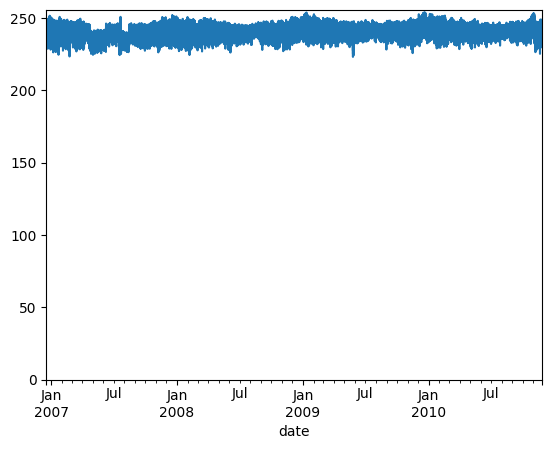

In [69]:
import matplotlib.pyplot as plt

df.Voltage.plot()
plt.ylim(bottom=0)  # Establece el límite inferior del eje y a cero
plt.show()

In [70]:
df.drop(columns=['Voltage'], inplace=True)

In [71]:
df.head()

,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Consumption
date,,,,,
2006-12-16 17:24:00,0.418,0.0,1.0,17.0,4.236671
2006-12-16 17:25:00,0.436,0.0,1.0,16.0,5.377704
2006-12-16 17:26:00,0.498,0.0,2.0,17.0,5.397025
2006-12-16 17:27:00,0.502,0.0,1.0,17.0,5.411335
2006-12-16 17:28:00,0.528,0.0,1.0,17.0,3.703828


**Potencia reactiva**

Dado que ya está contemplada en el valor de potencia aparente (Consumption), y que tiene poca incidencia sobre esta última, que es la variable objetivo (la potencia activa influye mucho más), la elimino del análisis

In [72]:
df.drop(columns=['Global_reactive_power'], inplace=True)

In [73]:
df.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Consumption
date,,,,
2006-12-16 17:24:00,0.0,1.0,17.0,4.236671
2006-12-16 17:25:00,0.0,1.0,16.0,5.377704
2006-12-16 17:26:00,0.0,2.0,17.0,5.397025
2006-12-16 17:27:00,0.0,1.0,17.0,5.411335
2006-12-16 17:28:00,0.0,1.0,17.0,3.703828


**Submeterings**

Son subzonas de la casa, cada una tiene un tipo de artefactos distinto. Si bien se obtuvo info a partir del análisis de estas (por ejemplo las unidades climatizadoras consumen mucha potencia), un escenario más realista de implementación tendría un único medidor por casa, y no uno por zona, por lo que me pongo como objetivo predecir la potencia aparente (Consumption) en base a valores históricos unicamente. Si la performance del modelo no fuera adecuada, podría revisar esto

In [74]:
df.drop(columns=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], inplace=True)

In [75]:
df.head()

,Consumption
date,
2006-12-16 17:24:00,4.236671
2006-12-16 17:25:00,5.377704
2006-12-16 17:26:00,5.397025
2006-12-16 17:27:00,5.411335
2006-12-16 17:28:00,3.703828


In [77]:
df.shape

(2075259, 1)

## Agrego otras variables derivadas
Que surgen del analisis exploratorio de los datos, de los comportamientos periódicos. Me puede servir para algunos Modelos de machine Learning

In [78]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [79]:
df.head()

,Consumption,hour,day_of_week,month
date,,,,
2006-12-16 17:24:00,4.236671,17,5,12
2006-12-16 17:25:00,5.377704,17,5,12
2006-12-16 17:26:00,5.397025,17,5,12
2006-12-16 17:27:00,5.411335,17,5,12
2006-12-16 17:28:00,3.703828,17,5,12


# Almaceno el csv con todos los datos
Para la proxima etapa (entrenar un modelo de ML)

In [80]:
df.to_csv("processed_dataset.csv")